<a href="https://colab.research.google.com/github/Amealsuraj/Cat-Breed-Classification/blob/main/Cat_Breed_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import os

In [28]:
os.getcwd()

'/content/drive/My Drive/Totallity'

In [29]:
cd /content/drive/MyDrive/Totallity

/content/drive/MyDrive/Totallity


In [ ]:
#%rm -rf /content/drive/MyDrive/Totallity/data

In [ ]:
#!zip -r /content/drive/MyDrive/Totallity/test.zip  /content/drive/MyDrive/Totallity/test

**Downloading Data from kaggle**

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [ ]:
!kaggle datasets download -d ma7555/cat-breeds-dataset

100% 1.93G/1.93G [00:30<00:00, 51.6MB/s]
100% 1.93G/1.93G [00:30<00:00, 66.8MB/s]


In [ ]:
#!unzip /content/drive/MyDrive/Totallity/cat-breeds-dataset.zip

In [ ]:
classes

['Bombay',
 'British Shorthair',
 'Burmese',
 'Calico',
 'Dilute Calico',
 'Himalayan',
 'Munchkin',
 'Ragdoll',
 'Russian Blue',
 'Siberian']

In [ ]:
l =os.listdir('/content/drive/MyDrive/Totallity/images')

In [ ]:
remove_list=[]
for i in l:
    if i not in classes:
          remove_list.append('/content/drive/MyDrive/Totallity/images/' + i )

**Removing folders in images**

In [ ]:
from pathlib import Path
import shutil
for i in remove_list:
      dir_path =Path(i)
      shutil.rmtree(dir_path)

 **Importing the required libraries**

In [30]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow. keras.preprocessing.image import load_img,img_to_array
import tensorflow.keras.backend as K
from tensorflow. keras.preprocessing.image import ImageDataGenerator
import os
from tensorflow. keras.models import Sequential,Model,save_model,load_model
from tensorflow. keras.layers import Conv2D,Dense,Flatten;
from tensorflow. keras.regularizers import l2
from tensorflow. keras.optimizers import Adam
from sklearn.metrics import accuracy_score,f1_score,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

**Printing Number of Images of Each Class**

In [31]:
classes=["Bombay", "Calico", "Burmese", "Himalayan","Munchkin", "Ragdoll", "Siberian", "British Shorthair", "Russian Blue", "Dilute Calico"]

In [32]:
classes.sort()

In [33]:
classes_list=[]
for i in os.listdir('/content/drive/MyDrive/Totallity/images'):
    if i  in classes:
          classes_list.append('/content/drive/MyDrive/Totallity/images/' + i )
from pathlib import Path
for i,class_name in zip(classes_list,classes):
      dir_path =Path(i)
      print(class_name+":{}".format(len(os.listdir(i))))

Bombay:1835
British Shorthair:567
Burmese:344
Calico:3468
Dilute Calico:3230
Himalayan:1301
Munchkin:181
Ragdoll:2669
Russian Blue:1870
Siberian:189


In [55]:
my_dir = "/content/drive/MyDrive/Totallity/images/Bombay"
for fname in os.listdir(my_dir):
    if fname.startswith("aug"):
        os.remove(os.path.join(my_dir, fname))

In [56]:
classes_list=[]
for i in os.listdir('/content/drive/MyDrive/Totallity/images'):
    if i  in classes:
          classes_list.append('/content/drive/MyDrive/Totallity/images/' + i )
from pathlib import Path
for i,class_name in zip(classes_list,classes):
      dir_path =Path(i)
      print(class_name+":{}".format(len(os.listdir(i))))

Bombay:1835
British Shorthair:567
Burmese:344
Calico:3468
Dilute Calico:3230
Himalayan:1301
Munchkin:181
Ragdoll:2669
Russian Blue:1870
Siberian:189


**The dataset is imbalanced. So we can use over sample the data of minority class by data augmentation.**

In [34]:
size_list=[1835,567,344,3468,3230,1301,181,2669,1870,189]
factor =[]
for i in size_list:
  factor.append(np.round(3468/i))

In [43]:
factor

[2.0, 6.0, 10.0, 1.0, 1.0, 3.0, 19.0, 1.0, 2.0, 18.0]

In [52]:
%rm -rf /content/drive/MyDrive/Totallity/gen

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
no_datagen = ImageDataGenerator(
              rescale=1/1)
class_dir ="/content/drive/MyDrive/Totallity/images/"
gen_dir ="/content/drive/MyDrive/Totallity/gen/"

for factr,cls_name in zip(factor,os.listdir(class_dir)):
      print(factr)
      if not os.path.exists(gen_dir+ cls_name):
        os.makedirs(gen_dir + cls_name)
      if not os.path.exists(gen_dir+ cls_name):
        os.makedirs(gen_dir + cls_name)  
      img_dir =class_dir +cls_name+"/"
      save_dir = gen_dir + cls_name+"/"
      for img_name in os.listdir(img_dir):
          img = load_img(img_dir+img_name)  
          x = img_to_array(img)  
          x = x.reshape((1,) + x.shape)
          i = 0
          if factr ==1:
              for batch in no_datagen.flow(x, batch_size=64,save_to_dir=save_dir, save_prefix=img_name, save_format='png'):
                  break
          else:
               for batch in datagen.flow(x, batch_size=64,save_to_dir=save_dir, save_prefix='aug'+img_name, save_format='png'):
                   i = i+ 1
                   #print(i)
                   if i > factr-1:
                        break  # otherwise the generator would loop indefinitely

2.0
6.0
10.0
1.0


**Splitting Images folder into train and test folder**

In [ ]:
import os
import numpy as np
import shutil
import random
 
# # Creating Train /Test folders (One time use)
root_dir = '/content/drive/MyDrive/Totallity/'
classes_dir = os.listdir('/content/drive/MyDrive/Totallity/images')
 
test_ratio = 0.25
 
for cls in classes_dir:
    os.makedirs(root_dir +'/train/' + cls)
    os.makedirs(root_dir +'/test/' + cls)
 
 
    # Creating partitions of the data after shuffeling
    src = root_dir +'/images/'+ cls # Folder to copy images from
 
    allFileNames = os.listdir(src)
    np.random.shuffle(allFileNames)
    train_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                              [int(len(allFileNames)* (1-test_ratio))])
 
 
    train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
 
    test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]
 
    print('Total images: ', len(allFileNames))
    print('Training: ', len(train_FileNames))
    print('Testing: ', len(test_FileNames))
 
    # Copy-pasting images
    for name in train_FileNames:
        shutil.copy(name, root_dir +'/train/' + cls)
 
    for name in test_FileNames:
        shutil.copy(name, root_dir +'/test/' + cls)

FileExistsError: ignored

In [ ]:
train_datagen = ImageDataGenerator(
              rescale=1./255)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Totallity/train',
                                                 target_size = (150,150),
                                                 batch_size =64,
                                                 class_mode = 'categorical')
test_datagen = ImageDataGenerator(
              rescale=1./255)
testing_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Totallity/test',
                                                 target_size = (150,150),
                                                 batch_size =64,
                                                 class_mode = 'categorical')

Found 11736 images belonging to 10 classes.


In [ ]:
 
test_datagen = ImageDataGenerator(
              rescale=1./255)
testing_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Totallity/test',
                                                 target_size = (150,150),
                                                 batch_size =64,
                                                 class_mode = 'categorical')

Found 3918 images belonging to 10 classes.


**Inception Model**

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
model = InceptionV3(input_shape = (150, 150, 3), include_top = False, weights = 'imagenet')

**Making layers non-trainable**

In [ ]:
for layer in model.layers:
    layer.trainable = False

**Adding custom layers**

In [ ]:
x=Flatten()(model.output)
x=Dense(units=1024,activation ='relu')(x)
x=Dense(units=512,activation ='relu')(x)
output =Dense(units=10,activation='softmax')(x)
final_model =Model(inputs =model.input,outputs =output)
final_model.compile(loss='categorical_crossentropy',optimizer= Adam(1e-5),metrics=['accuracy'])

**Callback**

In [ ]:
callback=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=50,
    verbose=0,
    mode="min",
    restore_best_weights=False,
)

In [ ]:
!cp /content/drive/MyDrive/Totallity/images

**Training the model**

In [ ]:
 
with tf.device('/device:GPU:0'):
      history=final_model.fit(training_set,validation_data =testing_set,epochs=500,callbacks=[callback])

Epoch 1/500
184/184 [==============================] - 61s 314ms/step - loss: 1.3996 - accuracy: 0.5226 - val_loss: 1.1978 - val_accuracy: 0.5801
Epoch 2/500
184/184 [==============================] - 56s 303ms/step - loss: 0.9779 - accuracy: 0.6595 - val_loss: 1.1781 - val_accuracy: 0.5878
Epoch 3/500
184/184 [==============================] - 56s 303ms/step - loss: 0.7807 - accuracy: 0.7346 - val_loss: 1.1319 - val_accuracy: 0.6077
Epoch 4/500
184/184 [==============================] - 60s 325ms/step - loss: 0.6184 - accuracy: 0.7992 - val_loss: 1.1135 - val_accuracy: 0.6166
Epoch 5/500
184/184 [==============================] - 57s 310ms/step - loss: 0.4926 - accuracy: 0.8553 - val_loss: 1.1269 - val_accuracy: 0.6187
Epoch 6/500
184/184 [==============================] - 56s 303ms/step - loss: 0.3871 - accuracy: 0.9022 - val_loss: 1.1442 - val_accuracy: 0.6220
Epoch 7/500
184/184 [==============================] - 55s 301ms/step - loss: 0.3019 - accuracy: 0.9367 - val_loss: 1.1351 -

**Error Plot**

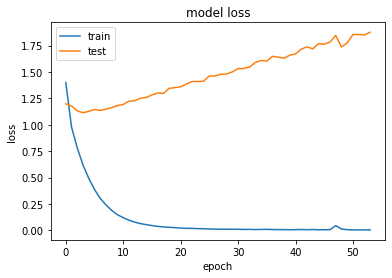

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Saving the model**


In [ ]:
save_model(final_model,'final_model.h5')
final_model.save('final_model.h5')

In [ ]:
test_model=load_model('final_model.h5')

In [ ]:
def predict(address):
    test_image=load_img(address,target_size=(150,150))
    test_image=img_to_array(test_image)
    test_image= np.expand_dims(test_image,axis=0)
    result=test_model.predict(test_image)
    result=np.round(result)
    for i in range(1,10):
        if result[0][i]==1:
          prediction=i
        else  
           prediction =  
          return prediction  
    

In [ ]:
test_directory ="/content/drive/MyDrive/Totallity/test/"
pred_dir ="/content/drive/MyDrive/Totallity/"
pred =[]
act =[]
for cls,cls_name in enumerate(os.listdir(test_directory)):
      
      if not os.path.exists(pred_dir+'/actual/' + cls_name):
        os.makedirs(pred_dir+'/actual/' + cls_name)
      if not os.path.exists(pred_dir+'/predicted/' + cls_name):
        os.makedirs(pred_dir+'/predicted/' + cls_name)  
      #os.makedirs(pred_dir+'/actual/' + cls_name)
      #os.makedirs(pred_dir+'/predicted/' + cls_name)
      file_names =os.listdir(test_directory + cls_name)
      for file in file_names:
        prediction =predict(test_directory + cls_name +"/"+ file)
        pred.append(prediction)
        act.append(cls)
      
      #pd.DataFrame(np.array(pred)).to_csv(pred_dir+'/predicted/' + cls_name+"/"+"pred.csv",header=None,index=False)  
      #pd.DataFrame(np.array(act)).to_csv(pred_dir+'/actual/' + cls_name+"/"+"act.csv",header =None,index=False)  
        

In [ ]:
from collections import Counter

Counter(pred)

Counter({3: 34, 4: 770, 5: 2556, 7: 540, None: 18})

In [ ]:
act.count('Nan')

0

In [ ]:
pred.count("")

0

In [ ]:
import math
count[math.isnan(i) for i in act]
act.

SyntaxError: ignored

In [ ]:
y_true =np.array(act)
y_pred= np.array(pred)


In [ ]:
roc_auc_score(y_true, y_pred)

ValueError: ignored

In [ ]:
roc_auc_score(y_true, y_pred)